# 🚗 Big Data Visualization Demo: Metro I-94 Traffic
This notebook demonstrates the difference between full-data visualization (Method 1) and aggregation (Method 2) using a real dataset of hourly traffic volume on Interstate 94.

## 📥 Step 1: Load the Dataset from UCI
Source: [Metro Interstate Traffic Volume - UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz'
df = pd.read_csv(url)
df['date_time'] = pd.to_datetime(df['date_time'])
df.shape

(48204, 9)

## 👀 Preview the Data

In [2]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## ❌ Method 1: Direct Plotting of All Rows

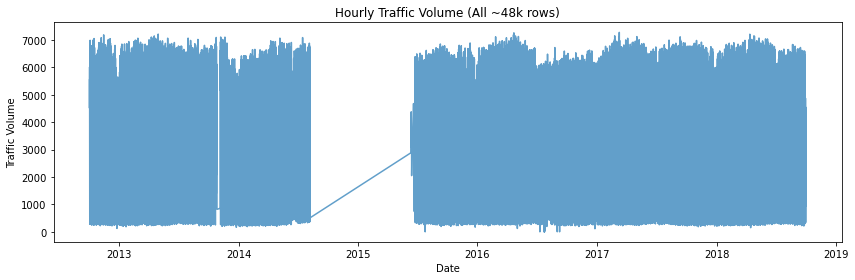

In [3]:
plt.figure(figsize=(12, 4))
plt.plot(df['date_time'], df['traffic_volume'], alpha=0.7)
plt.title("Hourly Traffic Volume (All ~48k rows)")
plt.xlabel("Date")
plt.ylabel("Traffic Volume")
plt.tight_layout()
plt.show()

## ❌ Method 1-1: Sampling

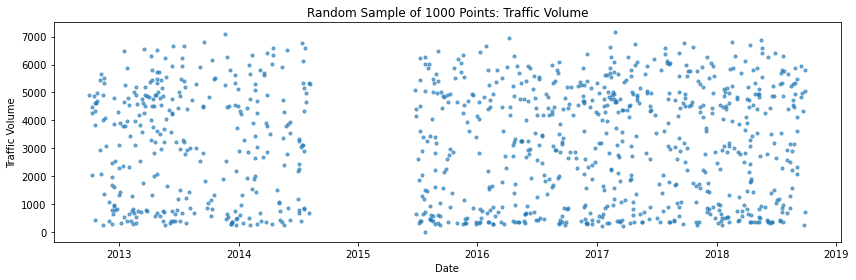

In [6]:
import numpy as np

# Randomly sample 1000 rows from the full dataset for plotting
sample_df = df.sample(n=1000, random_state=42)

plt.figure(figsize=(12, 4))
plt.scatter(sample_df['date_time'], sample_df['traffic_volume'], alpha=0.6, s=10)
plt.title("Random Sample of 1000 Points: Traffic Volume")
plt.xlabel("Date")
plt.ylabel("Traffic Volume")
plt.tight_layout()
plt.show()

## ✅ Method 2: Aggregated Plot - Daily Averages

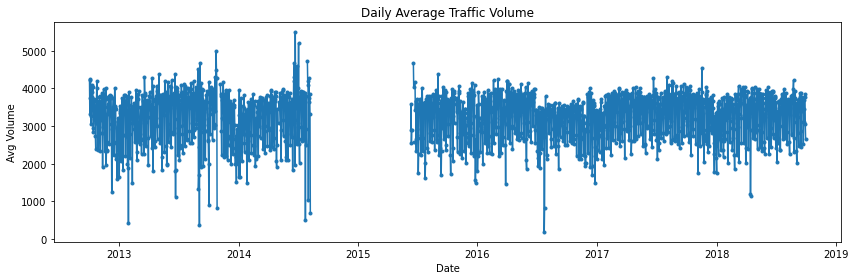

In [4]:
df_daily = df.set_index('date_time').resample('D')['traffic_volume'].mean().reset_index()
plt.figure(figsize=(12, 4))
plt.plot(df_daily['date_time'], df_daily['traffic_volume'], marker='.', linestyle='-')
plt.title("Daily Average Traffic Volume")
plt.xlabel("Date")
plt.ylabel("Avg Volume")
plt.tight_layout()
plt.show()

## 📉 Method 2 Extension: 7-Day Rolling Average

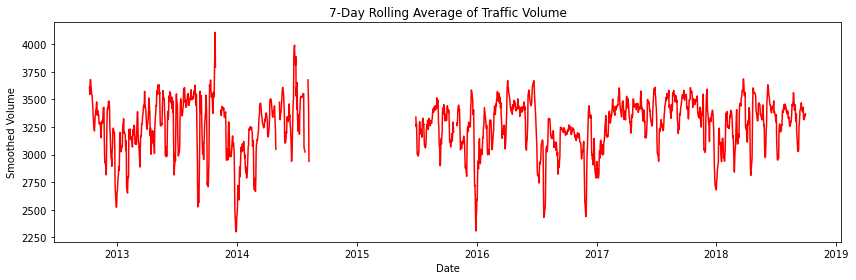

In [5]:
df_daily['rolling_7d'] = df_daily['traffic_volume'].rolling(window=7).mean()
plt.figure(figsize=(12, 4))
plt.plot(df_daily['date_time'], df_daily['rolling_7d'], color='red')
plt.title("7-Day Rolling Average of Traffic Volume")
plt.xlabel("Date")
plt.ylabel("Smoothed Volume")
plt.tight_layout()
plt.show()

## 💬 Reflection Questions
- Why does full-data plotting become ineffective as size grows?
- What patterns emerge with aggregation that are hard to see otherwise?
- When would you use rolling averages vs. downsampling?